In [1]:
import cryptowatch as cw
import pandas as pd
import datetime as dt
from datetime import timedelta
import numpy as np
import statsmodels.api as sm
import ta
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from binance.client import Client

In [2]:
#get data from cryptowatch
cw.api_key = "7N9GHE6PPS0ZF91V9V10"

k = cw.markets.list("BINANCE") # Returns all markets on Binance

data = cw.markets.get("BINANCE:BTCUSDT", ohlc=True, periods=["1d"])
data2 = cw.markets.get("BINANCE:ETHUSDT", ohlc=True, periods=["1d"])

In [3]:
data = pd.DataFrame(data.of_1d,columns=['Time','Open','High','Low','Close','Volume_base','Volume_quote'])
data2 = pd.DataFrame(data2.of_1d,columns=['Time','Open','High','Low','Close','Volume_base','Volume_quote'])

In [4]:
data['Date'] = np.zeros(len(data))
for i in range(len(data)):
    data['Date'].iloc[i] = dt.datetime.fromtimestamp(data['Time'].iloc[i]).date()

/Users/Eason/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [5]:
data2['Date'] = np.zeros(len(data2))
for i in range(len(data2)):
    data2['Date'].iloc[i] = dt.datetime.fromtimestamp(data2['Time'].iloc[i]).date()

In [6]:
data.drop("Time",axis=1,inplace=True)
data.set_index('Date',inplace=True)

In [7]:
data2.drop("Time",axis=1,inplace=True)
data2.set_index('Date',inplace=True)

In [8]:
#calculate the daily return
data['BTC'] = data['Close'].pct_change()
data2['ETH'] = data2['Close'].pct_change()

In [12]:
#BTC has one more day data than ETH so we have to drop that extra day
data = data[1:]

Text(0, 0.5, "ETH's daily return")

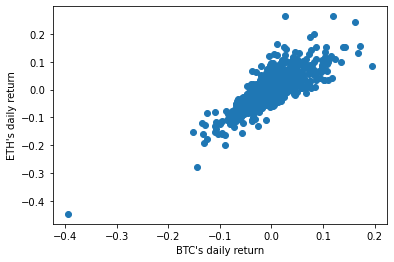

In [14]:
#plot scatterplot of those daily return
plt.scatter(data['BTC'][1:],data2['ETH'][1:])
plt.xlabel("BTC's daily return")
plt.ylabel("ETH's daily return")

In [15]:
#run regression on BTC and ETH's daily returns
temp = data.iloc[1:]
y = temp[['BTC']]
y.reset_index(inplace=True)
y.drop('Date',axis=1,inplace=True)
x = data2['ETH'][1:]
x = sm.add_constant(x)
x.reset_index(inplace=True)
x.drop('Date',axis=1,inplace=True)
model = sm.OLS(y,x,)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2454.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.65e-294
Time:                        11:53:01   Log-Likelihood:                 2876.4
No. Observations:                1224   AIC:                            -5749.
Df Residuals:                    1222   BIC:                            -5739.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.817      0.4

/Users/Eason/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


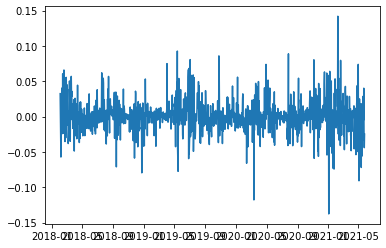

In [78]:
#show that the difference between BTC's daily return and 
#the coefficient from the regression * ETH's daily return looks kind of stationary
#therefore, we can buy BTC and sell ETH when the difference of the daily returns is smaller than -0.05
#vice versa, we can sell BTC and buy ETH when the difference is larger than 0.05
plt.plot(data['BTC'][1:]-0.62*data2['ETH'][1:])